<a href="https://colab.research.google.com/github/keshsri/machine-learning/blob/main/Sarcasm_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-09-11 20:10:24--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.2’

sarcasm.json.2      100%[===================>]   5.38M  6.77MB/s    in 0.8s    

2023-09-11 20:10:25 (6.77 MB/s) - ‘sarcasm.json.2’ saved [5643545/5643545]



In [2]:
import json

with open("./sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [3]:
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [7]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16433 (64.19 KB)
Trainable params: 16433 (64.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
num_epochs = 30

history = model.fit(
    training_padded,
    training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2
)

Epoch 1/30
625/625 - 6s - loss: 0.5242 - accuracy: 0.7341 - val_loss: 0.4119 - val_accuracy: 0.8113 - 6s/epoch - 9ms/step
Epoch 2/30
625/625 - 4s - loss: 0.3794 - accuracy: 0.8281 - val_loss: 0.3990 - val_accuracy: 0.8156 - 4s/epoch - 7ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3639 - accuracy: 0.8332 - val_loss: 0.4029 - val_accuracy: 0.8110 - 3s/epoch - 6ms/step
Epoch 4/30
625/625 - 3s - loss: 0.3582 - accuracy: 0.8359 - val_loss: 0.4041 - val_accuracy: 0.8086 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 4s - loss: 0.3560 - accuracy: 0.8393 - val_loss: 0.4059 - val_accuracy: 0.8128 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 2s - loss: 0.3533 - accuracy: 0.8388 - val_loss: 0.4057 - val_accuracy: 0.8126 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 2s - loss: 0.3526 - accuracy: 0.8403 - val_loss: 0.4060 - val_accuracy: 0.8134 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 1s - loss: 0.3507 - accuracy: 0.8395 - val_loss: 0.4036 - val_accuracy: 0.8095 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

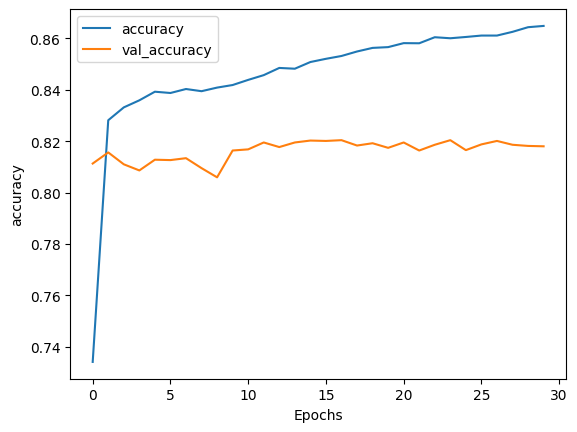

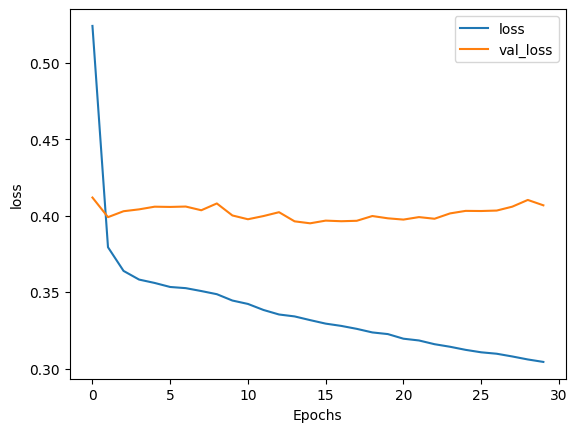

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")